![Alt text](Do_Apples_Affect_Diabetes_and_Blood_Sugar_Levels-732x549-thumbnail-1-732x549.avif)


Headers :

* index: The index of the dataframe.
* A_id: The ID of the item.
* Size: The size of the item in some unit of measurement.
* Weight: The weight of the item in some unit of measurement.
* Sweetness: The level of sweetness of the item on a scale from very sweet to very sour.
* Crunchiness: The level of crunchiness of the item on a scale from very soft to very crunchy.
* Juiciness: The level of juiciness of the item on a scale from very dry to very juicy.
* Ripeness: The level of ripeness of the item on a scale from unripe to overripe.
* Acidity: The level of acidity of the item on a scale from very low to very high.
* Quality: The overall quality rating of the item, either "good" or "bad".

In [20]:
# importing necessary libraries

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyClassifier
from sklearn.metrics import confusion_matrix

## Reading dataset

In [21]:
df = pd.read_csv(r'C:\Users\FUJISU\apple_quality.csv')

In [22]:
df.shape

(4001, 9)

In [23]:
df.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.00,-3.97,-2.51,5.35,-1.01,1.84,0.33,-0.491590483,good
1,1.00,-1.20,-2.84,3.66,1.59,0.85,0.87,-0.722809367,good
2,2.00,-0.29,-1.35,-1.74,-0.34,2.84,-0.04,2.621636473,bad
3,3.00,-0.66,-2.27,1.32,-0.10,3.64,-3.41,0.790723217,good
4,4.00,1.36,-1.30,-0.38,-0.55,3.03,-1.30,0.501984036,good


In [24]:
df.dtypes

A_id           float64
Size           float64
Weight         float64
Sweetness      float64
Crunchiness    float64
Juiciness      float64
Ripeness       float64
Acidity         object
Quality         object
dtype: object

## Cleaning the data

In [25]:
# converting acidity to float64
# we discovered a row with an invalid data

df.dropna(inplace=True)

df['Acidity'] = df['Acidity'].astype(float)

In [26]:
df.drop(labels = ['A_id'], axis = 1, inplace = True)

In [27]:
df.describe()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
count,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00
mean,-0.50,-0.99,-0.47,0.99,0.51,0.50,0.08
std,1.93,1.60,1.94,1.40,1.93,1.87,2.11
min,-7.15,-7.15,-6.89,-6.06,-5.96,-5.86,-7.01
25%,-1.82,-2.01,-1.74,0.06,-0.80,-0.77,-1.38
50%,-0.51,-0.98,-0.50,1.00,0.53,0.50,0.02
75%,0.81,0.03,0.80,1.89,1.84,1.77,1.51
max,6.41,5.79,6.37,7.62,7.36,7.24,7.40


In [28]:
df.isnull().sum()

Size           0
Weight         0
Sweetness      0
Crunchiness    0
Juiciness      0
Ripeness       0
Acidity        0
Quality        0
dtype: int64

In [29]:
plots = ['Weight', 'Sweetness', 'Crunchiness', 'Juiciness',
       'Ripeness', 'Acidity']

In [30]:
# Reomivng outliers
for i in plots:
    df = df[(df[i] <= df[i].quantile(0.99)) & (df[i] >= df[i].quantile(0.01))]

In [31]:
df.shape

(3538, 8)

## EDA

In [32]:
# Count of good and bad apples

Quality_count = df['Quality'].value_counts()
pd.DataFrame(Quality_count)

,count
Quality,
bad,1784
good,1754


<Figure size 2000x2000 with 0 Axes>

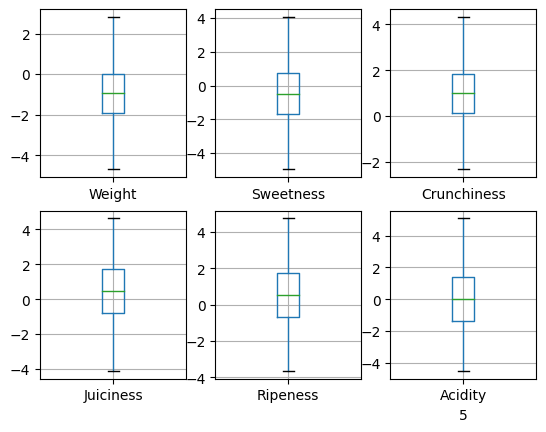

In [33]:
# boxplot showing outliers have been handled

plt.figure(figsize=(20,20))
fig, ax = plt.subplots( nrows=2, \
    ncols=3)
ax = ax.flatten()
for i, column in enumerate(plots):
    axes = ax[i]
    df.boxplot(column = column, ax= axes)
    plt.xlabel(i)
plt.show()

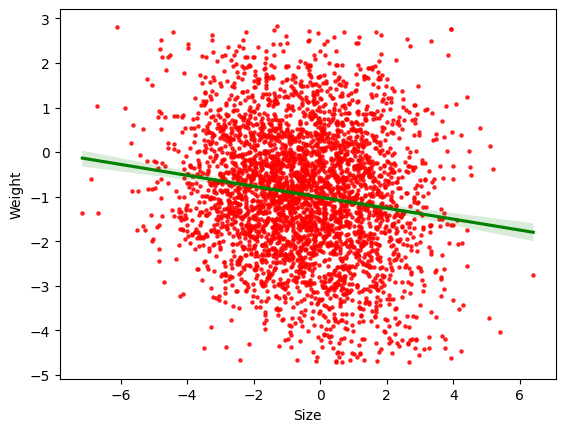

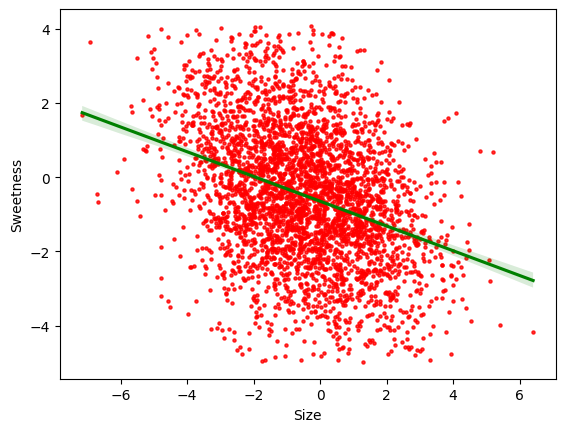

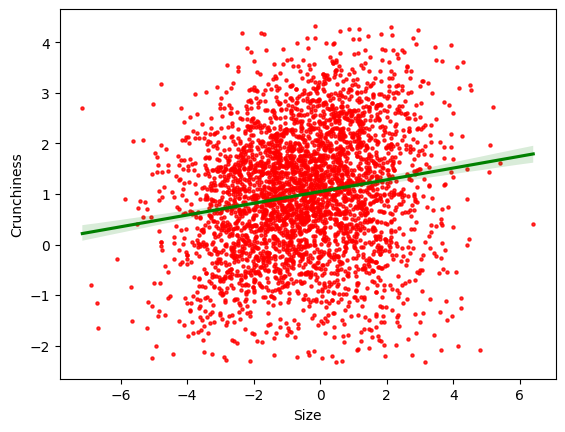

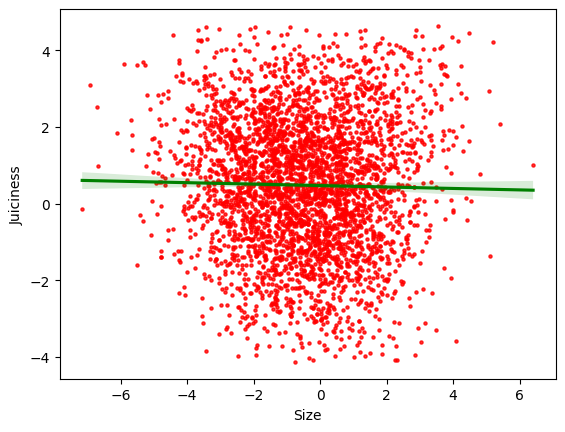

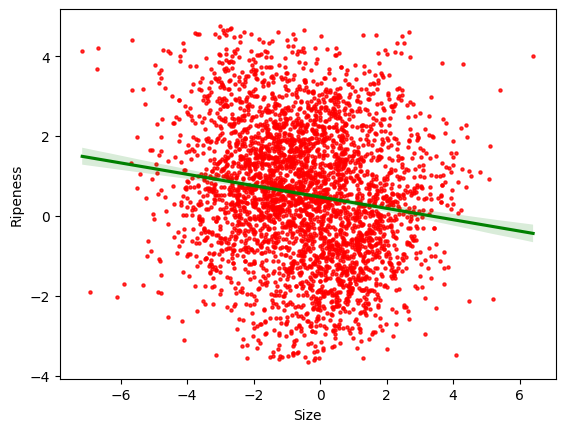

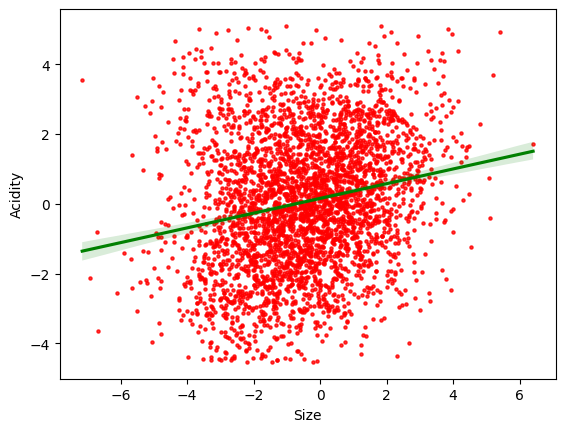

In [34]:
# Regression plot of descriptive variables against size

for i in plots:

    fig, ax = plt.subplots()
    sns.regplot(data = df, x = 'Size', y = i, ax = ax, line_kws={'color':'green'}, scatter_kws={'color':'red', 'marker':'.','s':5})
    plt.show()


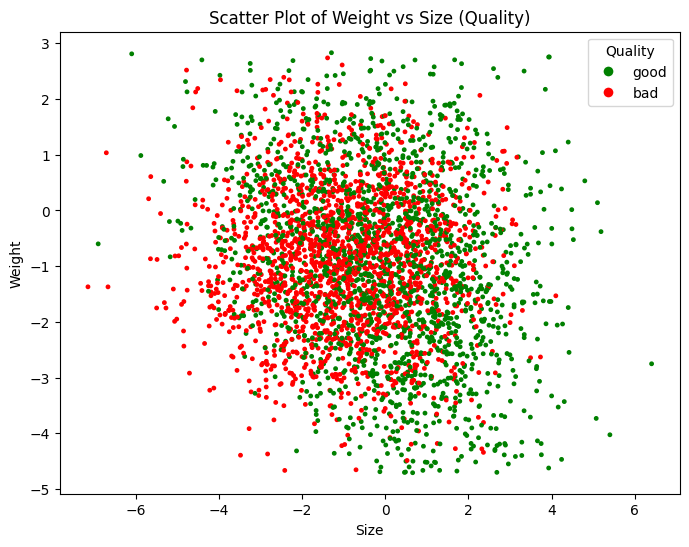

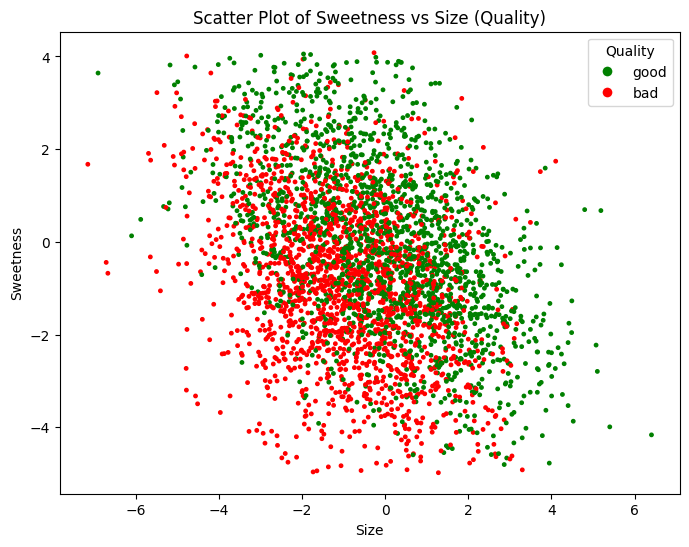

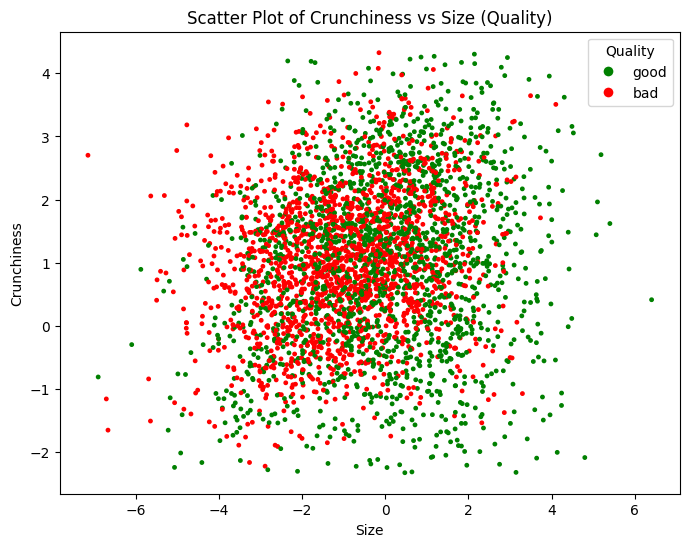

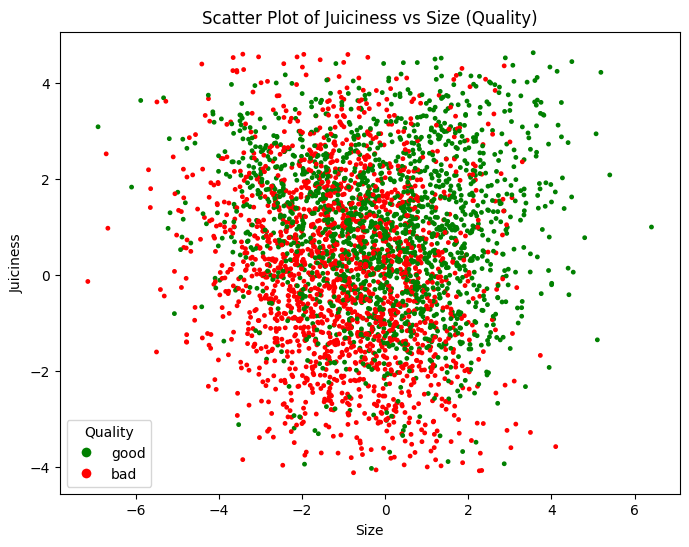

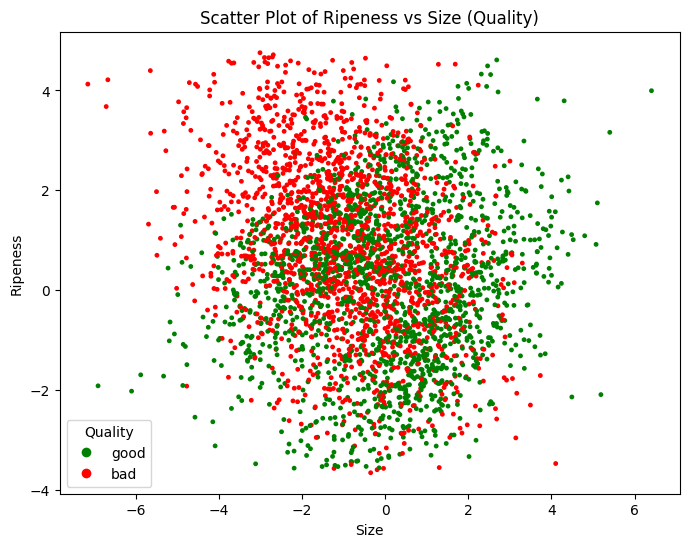

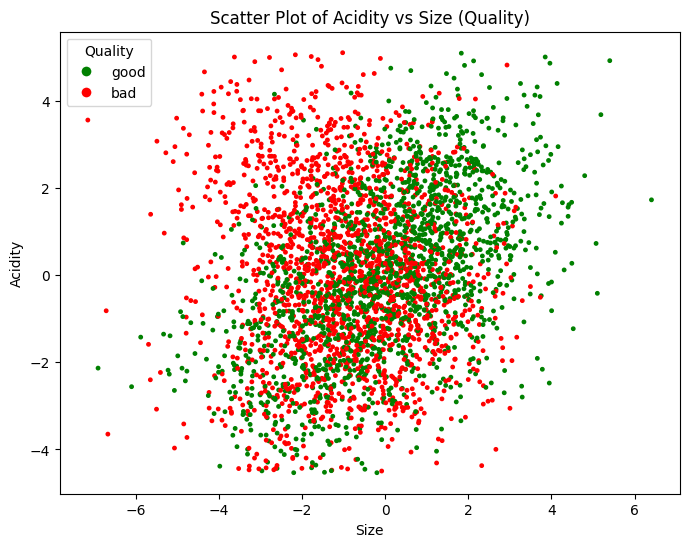

In [35]:
# creating scatter plot to see the relationships with sze and quality
# Define colors for different qualities
colors = {'good': 'green', 'bad': 'red'}

# Iterate through each column (except 'Size')
for column in df.columns[:-1]:
    if column != 'Size':
        # Create a scatter plot
        plt.figure(figsize=(8, 6))
        plt.scatter(df['Size'], df[column], c=[colors[label] for label in df['Quality']], s=6)
        plt.title(f"Scatter Plot of {column} vs Size (Quality)")
        plt.xlabel("Size")
        plt.ylabel(column)
        
        # Create custom legend for the colored points
        legend_elements = [
            plt.Line2D([0], [0], marker='o', color='w', label='good', markerfacecolor='green', markersize=8),
            plt.Line2D([0], [0], marker='o', color='w', label='bad', markerfacecolor='red', markersize=8)
        ]
        plt.legend(handles=legend_elements, title='Quality')
        
        plt.show()


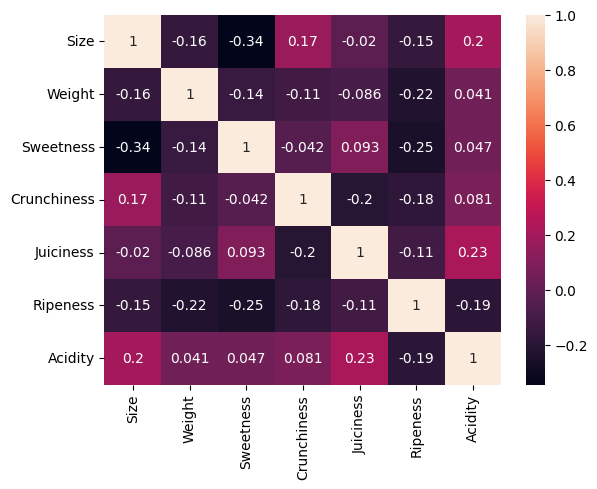

In [36]:
# Creating a correlation heatmap


sns.heatmap(df.corr(numeric_only = True), annot=True)

plt.show()

## Model testing

In [37]:
# encoding a label to our dependent variable
df_copy = df.copy()
label = LabelEncoder()
df_copy['Quality_label'] = label.fit_transform(df_copy['Quality'])
df_copy.drop('Quality', axis = 1, inplace = True)
label.classes_

array(['bad', 'good'], dtype=object)

In [38]:
X = df_copy[df_copy.columns[:-1]]       # Independent variables
y = df_copy[df_copy.columns[-1]]        # Dependent variables

In [40]:
# converting data to scale of 0 to 1

scaler = MinMaxScaler()    # first steo to initialize the MinMaxScaler

cols = X.columns
x = pd.DataFrame(scaler.fit_transform(X))    # fit and transform scaler to data
x.columns = cols                             # replaces the numbers generated for columns to the original column names

In [41]:
# splitting the data to train and test model

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=2)

In [42]:
# performance of different models on test and train data

lazy = LazyClassifier(predictions=True)    #initiating LazyClassifier
summary, predictions = lazy.fit(x_train, x_test, y_train, y_test)

print(summary)

 97%|█████████▋| 28/29 [00:13<00:00,  1.77it/s]

[LightGBM] [Info] Number of positive: 1231, number of negative: 1245
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000765 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1785
[LightGBM] [Info] Number of data points in the train set: 2476, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.497173 -> initscore=-0.011309
[LightGBM] [Info] Start training from score -0.011309


100%|██████████| 29/29 [00:14<00:00,  2.02it/s]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
ExtraTreesClassifier               0.89               0.89     0.89      0.89   
SVC                                0.89               0.89     0.89      0.89   
LGBMClassifier                     0.89               0.89     0.89      0.89   
KNeighborsClassifier               0.88               0.88     0.88      0.88   
XGBClassifier                      0.88               0.88     0.88      0.88   
LabelSpreading                     0.88               0.88     0.88      0.88   
LabelPropagation                   0.88               0.88     0.88      0.88   
RandomForestClassifier             0.87               0.87     0.87      0.87   
NuSVC                              0.87               0.87     0.87      0.87   
QuadraticDiscriminantAnalysis      0.86               0.86     0.86      0.86   
BaggingClassifier           

In [43]:
# top 5 model predictions of apple quality

top5 = summary.index[:5]
top5pred = predictions[top5]

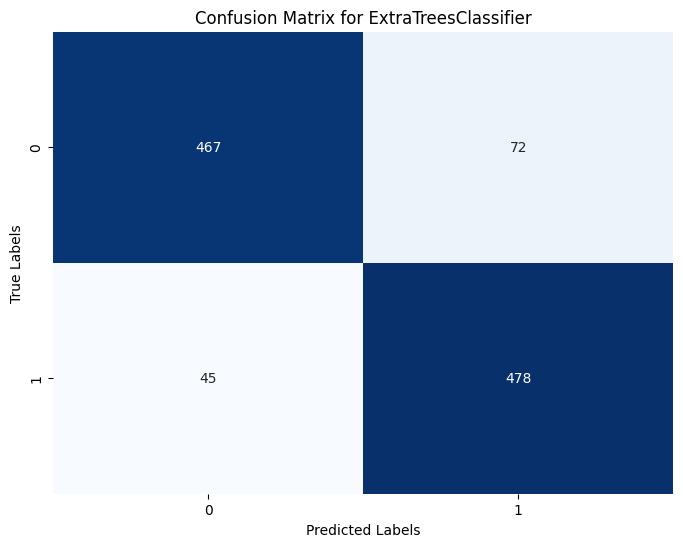

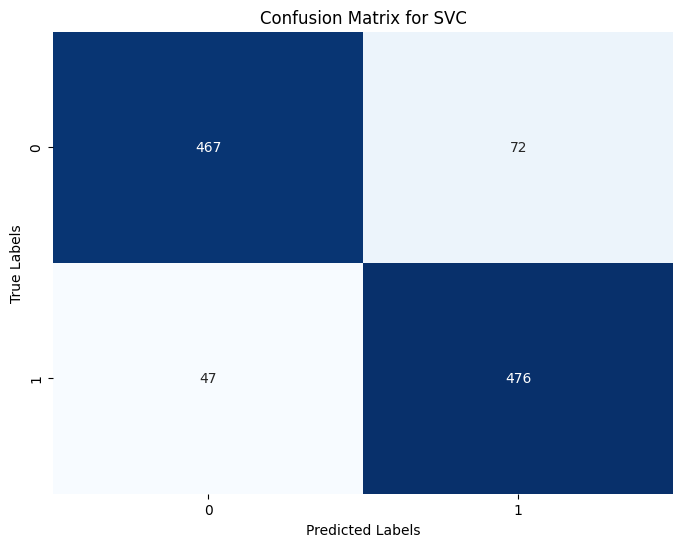

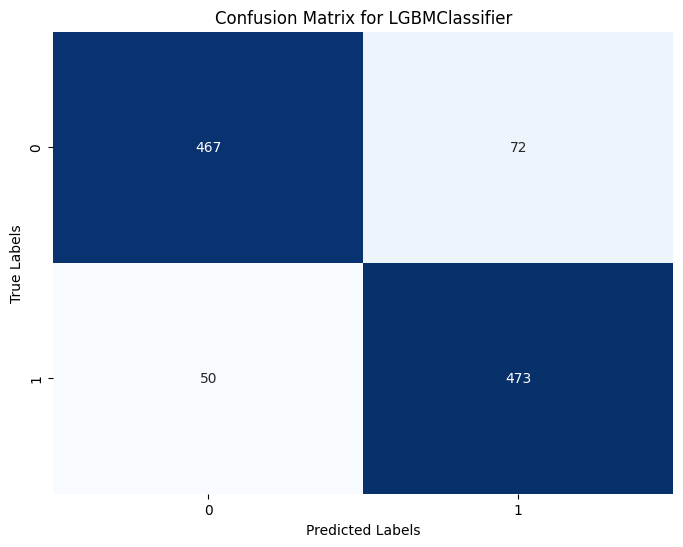

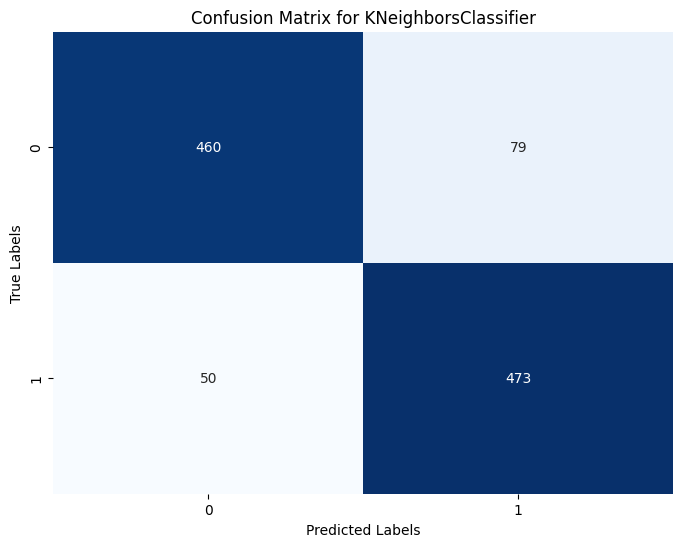

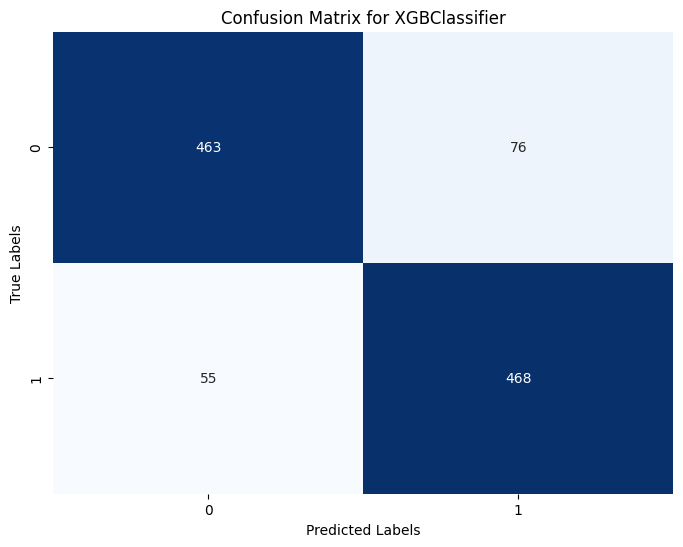

In [44]:
# confusion matrix with True Negative, False Positive, False Negative and True Positive  

for i in range(5):
    y_pred = top5pred.iloc[:,i]
    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    # Visualize confusion matrix as heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(f'Confusion Matrix for {top5pred.columns[i]}')
    plt.show()

In [ ]:
y_test